# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [73]:
# for k_means_3
mean_3 = np.append(np.mean(X, axis=0), y.mean())
max_3 = np.append(np.max(X, axis=0), y.max())
min_3 = np.append(np.min(X, axis=0), y.min())

init_3 = np.array([mean_3,max_3,min_3])

In [74]:
# for k_means_5
per75 = np.append(np.percentile(X, 75, axis=0), np.percentile(y, 75))
per50 = np.append(np.percentile(X, 50, axis=0), np.percentile(y, 50))
per25 = np.append(np.percentile(X, 25, axis=0), np.percentile(y, 25))
min5 = np.append(np.min(X, axis=0), y.max())
max5 = np.append(np.max(X, axis=0), y.max())

init_5 = np.array([per75, per50, per25, min5, max5])

In [86]:
estimators = [
    ('k_means_3', KMeans(n_clusters=3, init=init_3))
#     ,('k_means_5', KMeans(n_clusters=5))
#     ,('k_means_7', KMeans(n_clusters=7))
#     ,('k_means_7_init_random', KMeans(n_clusters=7, init='random'))
]

In [87]:
for name, estimator in estimators:
    print(estimator)

KMeans(algorithm='auto', copy_x=True,
       init=array([[5.84333333, 3.05733333, 3.758     , 1.19933333, 1.        ],
       [7.9       , 4.4       , 6.9       , 2.5       , 2.        ],
       [4.3       , 2.        , 1.        , 0.1       , 0.        ]]),
       max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)


資料建模 並 視覺化 結果

ValueError: The number of features of the initial centers 5 does not match the number of features of the data 4.

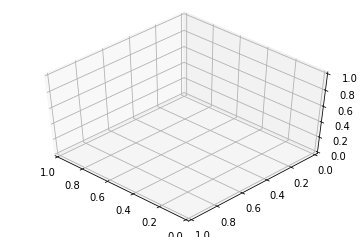

In [88]:
fignum = 1
titles = ['3 clusters', '5 clusters', '7 clusters', '7 clusters with random init']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(5, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2),
                    ('cls3', 3)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()